In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar

In [20]:

sns_iris = sns.load_dataset("iris")

In [21]:
table = iris.Iris(sns_iris)

In [27]:
cmap = {'setosa':'C0', 'versicolor':'C1', 'virginica':'C2'}
transforms = {'x': ('sepal_length', position.Position()),       
              'y': ('sepal_width', position.Position()),
              'facecolors':('species', color.NominalColor(cmap))}


[(4.3, 7.9),
 (2.0, 4.4),
 Text(0.5, 0, 'sepal_length'),
 Text(0, 0.5, 'sepal_width'),
 None]

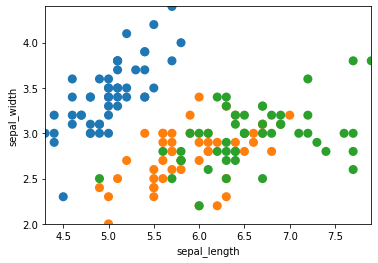

In [29]:
fig, ax = plt.subplots()

artist = point.Point(table, transforms)
ax.add_artist(artist)
ax.set(xlim = (table.view()[transforms['x'][0]].min(), 
               table.view()[transforms['x'][0]].max()), 
       ylim = (table.view()[transforms['y'][0]].min(), 
               table.view()[transforms['y'][0]].max()),       
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


In [30]:
freq = sns_iris['species'].value_counts()

In [32]:
tfreq = iris.FrequencyBar(freq.index, freq.values)

In [33]:
tfreq.view()

{'category': Index(['versicolor', 'setosa', 'virginica'], dtype='object'),
 'count': array([50, 50, 50], dtype=int64)}

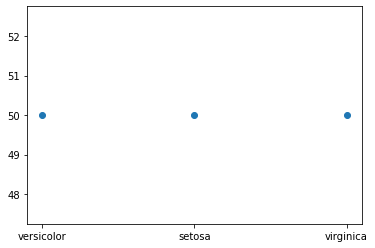

In [34]:
plt.scatter(freq.index, freq.values)

In [35]:
locs = {k:i for i,k in enumerate(tfreq.FB.F['category'].categories)}
fts = {'x':('category', position.NominalPosition(locs)),  
            'y':('count', position.Position())}

NameError: name 'channels' is not defined

In [16]:
type(channels.Position().convert(tfreq.view()['count'])[0])

numpy.int64

[(-1.0, 4.0), (45.0, 55.0), None]

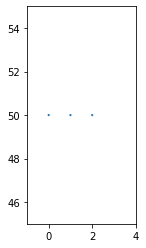

In [17]:
fig, ax = plt.subplots()

artist = artists.Point(tfreq, fts)
ax.add_artist(artist)
ax.set(xlim = (-1,4), ylim=(45,55), aspect='equal')


In [18]:
fts = {'position':('category', channels.NominalPosition(locs)),  
        'length':('count', channels.Position())}

{'position': ('category', <channels.NominalPosition object at 0x00000273CFB1D040>), 'length': ('count', <channels.Position object at 0x00000273CFB1D0A0>)}


[(-0.5, 3.5),
 (47.5, 52.5),
 Text(0.5, 0, 'category'),
 Text(0, 0.5, 'count'),
 None]

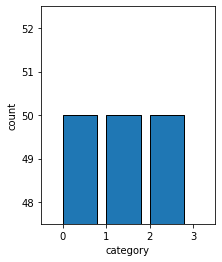

In [19]:
fig, ax = plt.subplots()

artist = artists.Bar(tfreq, fts)
ax.add_artist(artist)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (tfreq.view()[fts['length'][0]].min(), 
               tfreq.view()[fts['length'][0]].max()),       
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], 
       aspect='equal')

{'position': ('category', <channels.NominalPosition object at 0x00000273CFB1D040>), 'length': ('count', <channels.Position object at 0x00000273CFB1D0A0>)}


[(-0.5, 3.5),
 (47.5, 52.5),
 Text(0.5, 0, 'category'),
 Text(0, 0.5, 'count'),
 None]

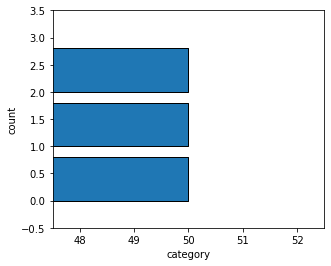

In [20]:
fig, ax = plt.subplots()

artist = artists.Bar(tfreq, fts, orientation='horizontal')
ax.add_artist(artist)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (tfreq.view()[fts['length'][0]].min(), 
               tfreq.view()[fts['length'][0]].max()),       
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], 
       aspect='equal')

# grouped bar

In [21]:
bt = iris.Iris(sns_iris.groupby('species').mean().reset_index())

In [22]:
bt.view().keys()

Index(['species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

In [23]:
gts = {'position': ('species', channels.NominalPosition(locs)),  
        'length':[(['sepal_length', 'sepal_width', 
                   'petal_length', 'petal_width'],             
                    channels.Position())]}
                 
        
        
        

In [26]:
fig, ax = plt.subplots()
artists.stacked_bar(ax, bt, gts, orientation='v')

{'position': ('species', <channels.NominalPosition object at 0x00000273CFBEB1F0>), 'floor': ('floor', <channels.Position object at 0x00000273CFD94FA0>), 'length': ('sepal_length', <channels.Position object at 0x00000273CFBEB5E0>)}


KeyError: 'floor'

In [28]:
import matplottoy

ModuleNotFoundError: No module named 'matplottoy'